<a href="https://colab.research.google.com/github/Haryohmi/Data-Science/blob/main/BA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
#import shap
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pip install chardet


In [ ]:
import chardet

# Detect encoding
with open('/content/drive/MyDrive/Colab Notebooks/10Alytics/customer_booking.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding when reading the CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/10Alytics/customer_booking.csv', encoding=result['encoding'])
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
# Numerical statistical analysis
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


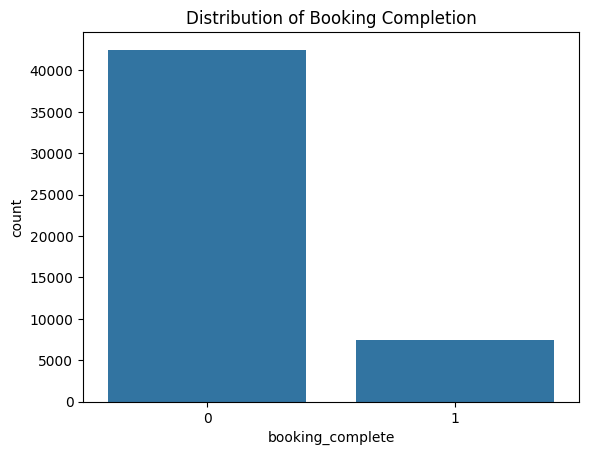

<ipython-input-8-5be509bf1100>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


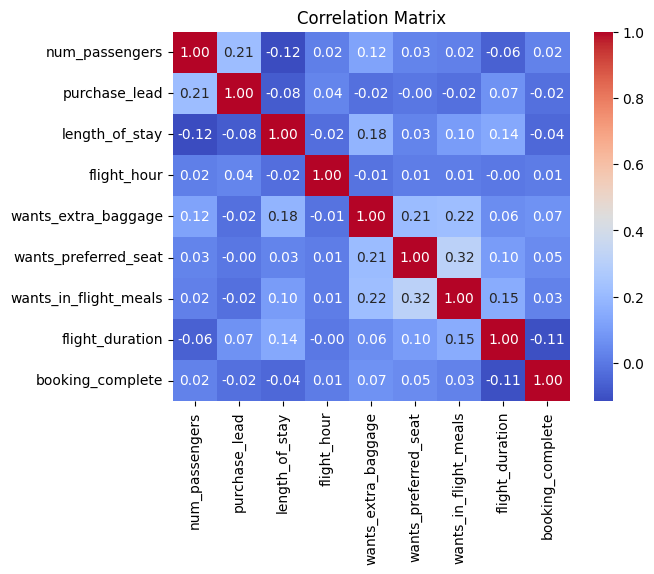

In [ ]:
# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='booking_complete', data=df)
plt.title('Distribution of Booking Completion')
plt.show()

# Correlation matrix heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

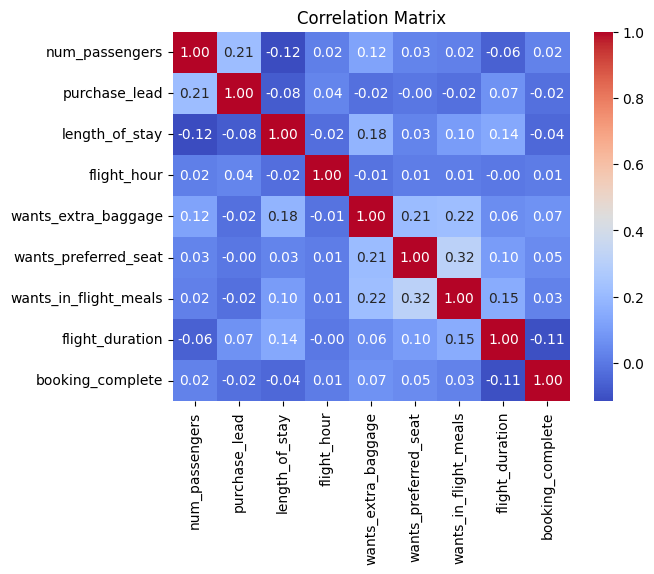

In [ ]:
#numeric_only correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Explore categorical variables
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in sales_channel: ['Internet' 'Mobile']
Unique values in trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
Unique values in flight_day: ['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']
Unique values in route: ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 

In [ ]:
df.drop(["booking_origin"], axis=1,inplace=True)


In [ ]:
# Explore categorical variables
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in sales_channel: ['Internet' 'Mobile']
Unique values in trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
Unique values in flight_day: ['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']


In [ ]:
# Categorical statistical analysis
df.describe(include=["object", "bool"])

,sales_channel,trip_type,flight_day
count,50000,50000,50000
unique,2,3,7
top,Internet,RoundTrip,Mon
freq,44382,49497,8102


In [ ]:
# Missing data Exploration
null_vals = df.isnull().sum()
null_vals

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

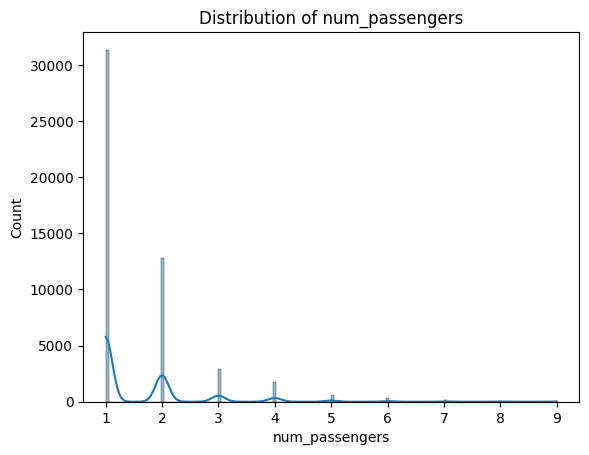

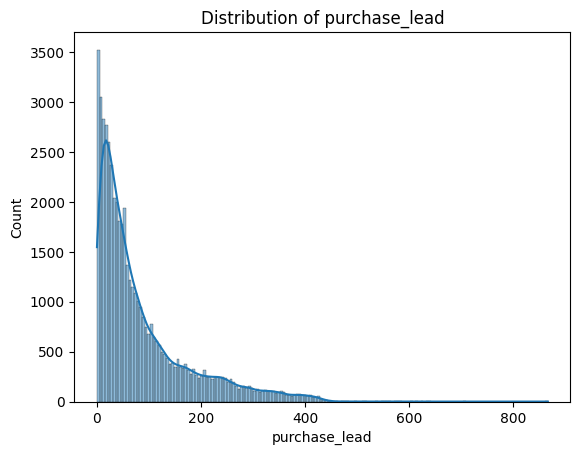

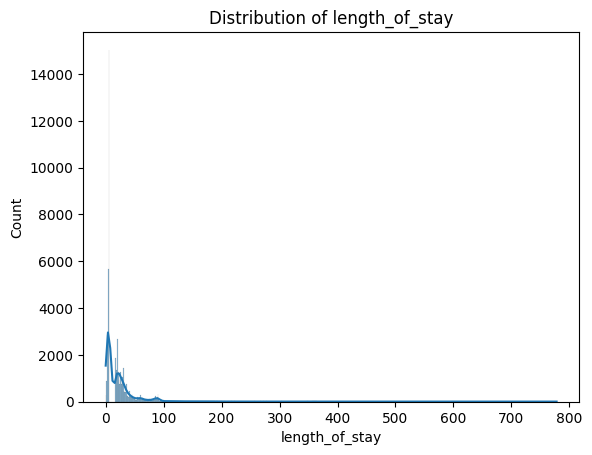

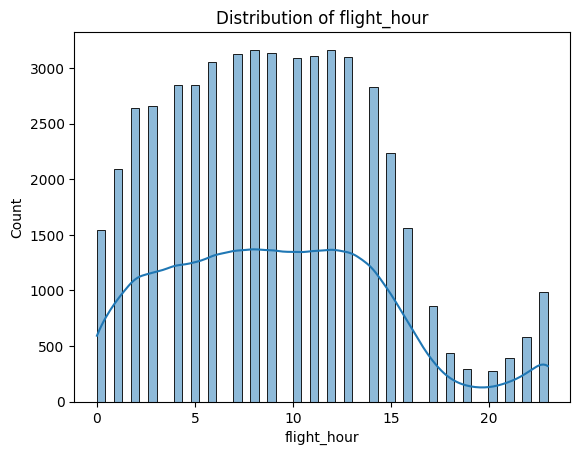

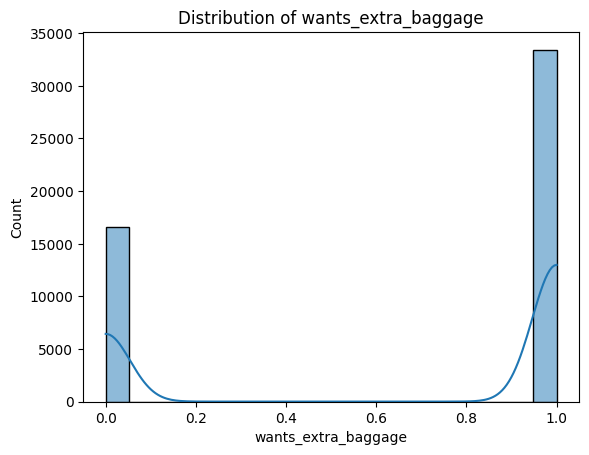

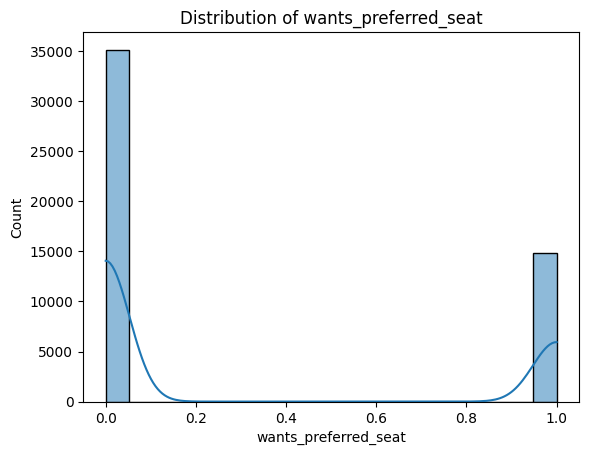

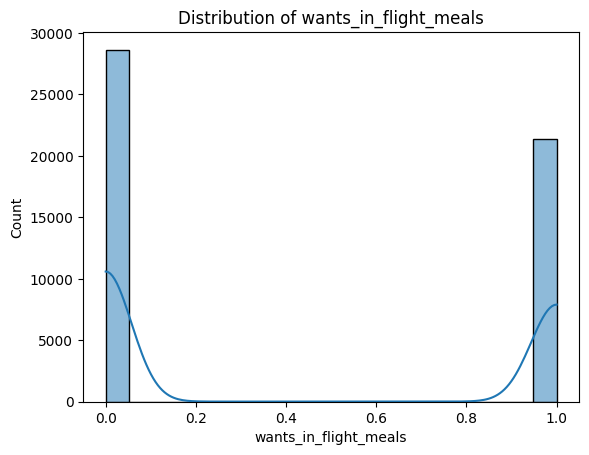

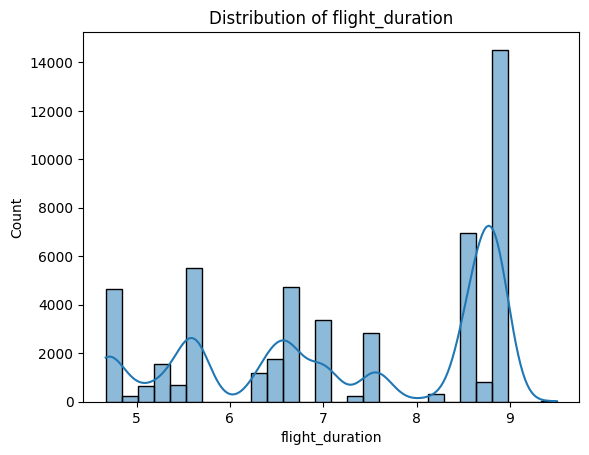

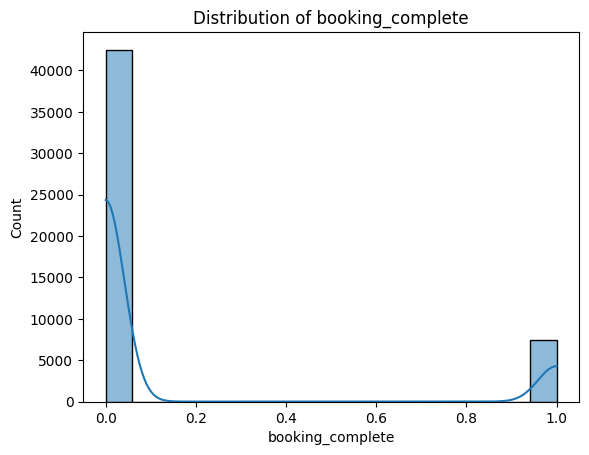

In [ ]:
# Explore numerical variables
for column in df.select_dtypes(exclude=['object']).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
df.head(4)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,0,0,1,5.52,0


Data ***Preparation***

In [ ]:
# Encoding categorical variables
df_train_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day'], drop_first=True)
df_train_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,262,19,7,1,0,0,5.52,0,0,0,1,0,1,0,0,0,0
1,1,112,20,3,0,0,0,5.52,0,0,0,1,0,1,0,0,0,0
2,2,243,22,17,1,1,0,5.52,0,0,0,1,0,0,0,0,0,1
3,1,96,31,4,0,0,1,5.52,0,0,0,1,0,1,0,0,0,0
4,2,68,22,15,1,0,1,5.52,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0,0,0,1,0,1,0,0,0,0
49996,1,111,6,4,0,0,0,5.62,0,0,0,1,0,0,1,0,0,0
49997,1,24,6,22,0,0,1,5.62,0,0,0,1,0,1,0,0,0,0
49998,1,15,6,11,1,0,1,5.62,0,0,0,1,1,0,0,0,0,0


In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df_train_encoded.drop('booking_complete', axis=1)
y = df_train_encoded['booking_complete']

In [ ]:
# Split the data into training and testing sets
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("df_train shape:", df_train.shape)
print("df_test shape:", df_test.shape)


df_train shape: (40000, 17)
df_test shape: (10000, 17)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 33553 to 5857
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         10000 non-null  int64  
 1   purchase_lead          10000 non-null  int64  
 2   length_of_stay         10000 non-null  int64  
 3   flight_hour            10000 non-null  int64  
 4   wants_extra_baggage    10000 non-null  int64  
 5   wants_preferred_seat   10000 non-null  int64  
 6   wants_in_flight_meals  10000 non-null  int64  
 7   flight_duration        10000 non-null  float64
 8   sales_channel_Mobile   10000 non-null  uint8  
 9   trip_type_OneWay       10000 non-null  uint8  
 10  trip_type_RoundTrip    10000 non-null  uint8  
 11  flight_day_Mon         10000 non-null  uint8  
 12  flight_day_Sat         10000 non-null  uint8  
 13  flight_day_Sun         10000 non-null  uint8  
 14  flight_day_Thu         10000 non-null  uint8  
 15 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Fit the model
model.fit(df_train, y_train)


RandomForestClassifier()

**Prediction**

In [ ]:
prediction = model.predict(df_test)

In [ ]:
print("Predictions:", prediction)

Predictions: [0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_test is the true labels for your testing dataset
# Evaluate accuracy
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, prediction))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8492
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.44      0.06      0.11      1480

    accuracy                           0.85     10000
   macro avg       0.65      0.52      0.51     10000
weighted avg       0.80      0.85      0.80     10000

Confusion Matrix:
 [[8398  122]
 [1386   94]]


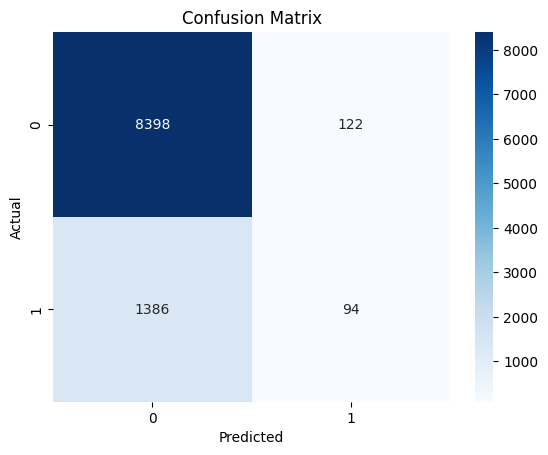

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, df_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.848125 0.851    0.848375 0.8435   0.854375]
Mean CV Score: 0.849075


To visualize how each variable contributes to the model, one common approach is to use feature importance plots. For tree-based models like RandomForest, you can leverage the built-in feature importance attribute. Here's an example using the RandomForestClassifier:
**bold text**
**bold text**

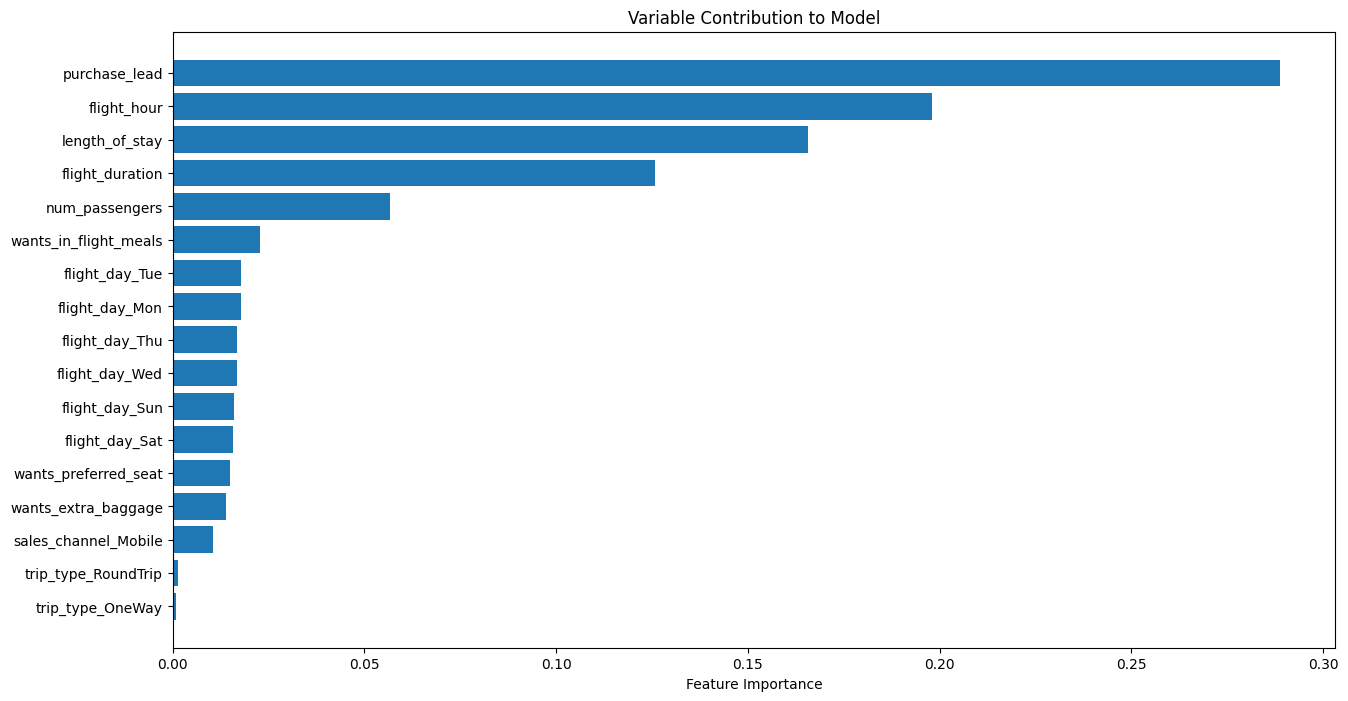

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier


# Initialize your model
model = RandomForestClassifier()
model.fit(df_train, y_train)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = df_train.columns

# Sort the features based on importance
sorted_indices = np.argsort(feature_importances)

# Plotting

plt.figure(figsize=(15, 8))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices])
plt.yticks(range(len(sorted_indices)), [feature_names[i]for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Variable Contribution to Model')
plt.show()
